# Chapter_2_Group_Exercise_1_Data_Preprocessing_on_a_Real_Dataset

Group Members:

1. Arya Shinde – Matriculation Number: 100006646
2. Mirang Bhandari – Matriculation Number: ______
3. Yash Annapure – Matriculation Number: 100006547
4. Anushka Sawant – Matriculation Number: 100006644


# Data Preprocessing on a Real Dataset
Objective
In this group exercise, we will apply data preprocessing techniques learned in Chapter 2 to a real-world dataset . The goal is to understand how raw data is prepared before applying machine learning models

## Dataset Requirements

Each group must select **one real dataset** from one of the following sources:

- Kaggle  
- UCI Machine Learning Repository  
- Open government data portals  

### The dataset must:
- Contain **numerical and/or categorical** features  
- Include **missing values and/or potential outliers**  
- Have **at least 100 records**  

### Each group must provide:
- **Dataset name**  
- **Source link**  
- **Short description** (2–3 lines)


# Step 1: Source a Dataset
For the below problem we have decided to move forward with "New York City Airbnb Open Data" from Kaggle.
This dataset contains Airbnb listing activity and related metrics for New York City in 2019, including host information, location details, and availability. It enables analysis of hosting patterns, geographic trends, and pricing behavior. additionally it has a ton of missing categorical and numerical values allowing us to perform substantial data pre-processing.


In [19]:
import pandas as pd

nyc_data = pd.read_csv("../Dataset/AB_NYC_2019.csv")
nyc_data.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Step 1.1: Check Missing Values and sum them up

In [20]:
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Step 1.2: Handle Missing Values Based on the data type and dataset relevance
The current dataset, as per the above code, has **16 `names`** and **21 `host_names`** missing, which is approximately **0.03%** of the dataset compared to the ~49,000 records we have. Hence, we can effectively drop these rows and still have a substantial amount of data, as these are just **identifiers**.

As for the `last_review` and `reviews_per_month` missing data, you can see that the rows which have no reviews have **`NaN`** values in **`last_review`** and `reviews_per_month`, which makes sense, if there are no reviews, there are no dates and thereby no reviews per month.
So we will be replacing `reviews_per_month` with 0 while keeping last_review as it is for correctness.


In [21]:
nyc_data = nyc_data.dropna(subset=['name', 'host_name'])
nyc_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
nyc_data['reviews_per_month'] = nyc_data['reviews_per_month'].fillna(0)
nyc_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Step 2: Scaling Numerical Features
 - Apply Z-score standardization
 - Apply Min–Max normalization
 - Briefly explain the difference

In [23]:
num_cols = [
    "latitude",
    "longitude",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

## Step 2.1 Apply Z-score standardization

In [28]:
from sklearn.preprocessing import StandardScaler

scaler_z = StandardScaler()
df_zscaled = nyc_data.copy()
df_zscaled[num_cols] = scaler_z.fit_transform(nyc_data[num_cols])
df_zscaled.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,-1.493773,-0.437612,Private room,-0.015570,-0.300329,-0.320388,2018-10-19,-0.551649,-0.034837,1.916263
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.452597,-0.684585,Entire home/apt,0.300794,-0.300329,0.487703,2019-05-21,-0.445217,-0.156180,1.840280
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,1.468605,0.222498,Private room,-0.011407,-0.200426,-0.522411,NaN,-0.683125,-0.186516,1.916263
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,-0.803291,-0.164426,Entire home/apt,-0.265330,-0.300329,5.538271,2019-07-05,2.221862,-0.186516,0.616965
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,1.275857,0.177220,Entire home/apt,-0.302795,0.149232,-0.320388,2018-11-19,-0.620518,-0.186516,-0.857091


## Step 2.2 Apply Min–Max normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
df_minmax = nyc_data.copy()
df_minmax[num_cols] = scaler_mm.fit_transform(nyc_data[num_cols])
df_minmax.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,0.357393,0.511921,Private room,0.0149,0.000000,0.014308,2018-10-19,0.003590,0.015337,1.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.614199,0.490469,Entire home/apt,0.0225,0.000000,0.071542,2019-05-21,0.006496,0.003067,0.972603
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,0.748252,0.569257,Private room,0.0150,0.001601,0.000000,NaN,0.000000,0.000000,1.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,0.448496,0.535649,Entire home/apt,0.0089,0.000000,0.429253,2019-07-05,0.079316,0.000000,0.531507
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.722820,0.565324,Entire home/apt,0.0080,0.007206,0.014308,2018-11-19,0.001709,0.000000,0.000000


## Step 2.3 Key Difference
### Z-score Standardization

- Centers data around mean = 0
- Scales based on standard deviation

### Min–Max Normalization

- Scales data to a fixed range [0, 1]
- Keeps original distribution shape

#### Z-score standardization rescales features to have zero mean and unit variance, while Min–Max normalization rescales features to a fixed range (usually 0–1).

## Handling Noise

# Choosing one numerical feature and Injecting artificial noise

NOISE HANDLING RESULTS

Original Data Statistics:
Mean: $131.64
Std Dev: $93.66

Noisy Data Statistics:
Mean: $129.56
Std Dev: $95.27

Smoothed Data Statistics:
Mean: $129.01
Std Dev: $44.83


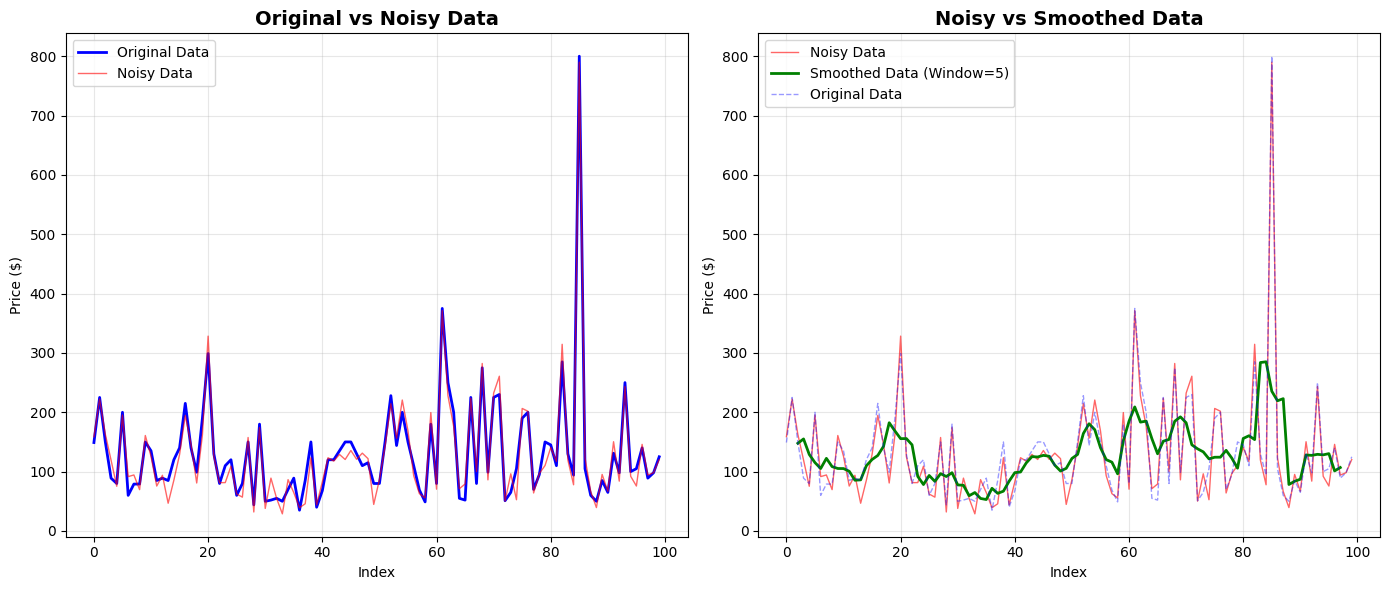


SAMPLE DATA COMPARISON (First 10 rows)
   Original   Noisy  Smoothed
0       149  158.93       NaN
1       225  222.23       NaN
2       150  162.95    147.78
3        89  119.46    155.06
4        80   75.32    128.93
5       200  195.32    115.21
6        60   91.58    105.24
7        79   94.35    122.34
8        79   69.61    108.43
9       150  160.85    105.25


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


nyc_data = pd.read_csv("../Dataset/AB_NYC_2019.csv") # Loading the dataset

feature = 'price'            # creating a feature variable so we can adjust/pick different features if needed

sample_data = nyc_data[feature].head(100).copy() # Take a sample of the original data for cleaner visualization

# 2. Inject artificial noise
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 20, len(sample_data))  # Mean=0, Std=20
noisy_data = sample_data + noise

# 3. Apply smoothing technique(Rolling Mean)
window_size = 5
smoothed_data = noisy_data.rolling(window=window_size, center=True).mean()

# 4. before and after results
print("=" * 60)
print("NOISE HANDLING RESULTS")
print("=" * 60)
print(f"\nOriginal Data Statistics:")
print(f"Mean: ${sample_data.mean():.2f}")
print(f"Std Dev: ${sample_data.std():.2f}")

print(f"\nNoisy Data Statistics:")
print(f"Mean: ${noisy_data.mean():.2f}")
print(f"Std Dev: ${noisy_data.std():.2f}")

print(f"\nSmoothed Data Statistics:")
print(f"Mean: ${smoothed_data.mean():.2f}")
print(f"Std Dev: ${smoothed_data.std():.2f}")

# Visualization
plt.figure(figsize=(14, 6))

# Plot 1: Original vs Noisy Data
plt.subplot(1, 2, 1)
plt.plot(sample_data.values, label='Original Data', color='blue', linewidth=2)
plt.plot(noisy_data.values, label='Noisy Data', color='red', alpha=0.6, linewidth=1)
plt.title('Original vs Noisy Data', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Noisy vs Smoothed Data
plt.subplot(1, 2, 2)
plt.plot(noisy_data.values, label='Noisy Data', color='red', alpha=0.6, linewidth=1)
plt.plot(smoothed_data.values, label=f'Smoothed Data (Window={window_size})', 
         color='green', linewidth=2)
plt.plot(sample_data.values, label='Original Data', color='blue', 
         alpha=0.4, linestyle='--', linewidth=1)
plt.title('Noisy vs Smoothed Data', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display sample of the data
print("\n" + "=" * 60)
print("SAMPLE DATA COMPARISON (First 10 rows)")
print("=" * 60)
comparison_df = pd.DataFrame({
    'Original': sample_data.head(10).values,
    'Noisy': noisy_data.head(10).values,
    'Smoothed': smoothed_data.head(10).values
})
print(comparison_df.round(2))